In [1]:
import pandas as pd

In [24]:
df=pd.read_csv("D:/Study Material/semester 6/Data Mining Lab/Project/archive (1)/PJME_hourly.csv")
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0
...,...,...
145361,2018-01-01 20:00:00,44284.0
145362,2018-01-01 21:00:00,43751.0
145363,2018-01-01 22:00:00,42402.0
145364,2018-01-01 23:00:00,40164.0


# Preprocessing

### Make 2 columns from 1 column

In [25]:
# Convert 'Datetime' column to pandas datetime object
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Extract date and time components into separate columns
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

df

,Datetime,PJME_MW,Date,Time
0,2002-12-31 01:00:00,26498.0,2002-12-31,01:00:00
1,2002-12-31 02:00:00,25147.0,2002-12-31,02:00:00
2,2002-12-31 03:00:00,24574.0,2002-12-31,03:00:00
3,2002-12-31 04:00:00,24393.0,2002-12-31,04:00:00
4,2002-12-31 05:00:00,24860.0,2002-12-31,05:00:00
...,...,...,...,...
145361,2018-01-01 20:00:00,44284.0,2018-01-01,20:00:00
145362,2018-01-01 21:00:00,43751.0,2018-01-01,21:00:00
145363,2018-01-01 22:00:00,42402.0,2018-01-01,22:00:00
145364,2018-01-01 23:00:00,40164.0,2018-01-01,23:00:00


In [26]:
# Drop the 'Datetime' column
df = df.drop(columns=['Datetime'])

In [27]:
df

,PJME_MW,Date,Time
0,26498.0,2002-12-31,01:00:00
1,25147.0,2002-12-31,02:00:00
2,24574.0,2002-12-31,03:00:00
3,24393.0,2002-12-31,04:00:00
4,24860.0,2002-12-31,05:00:00
...,...,...,...
145361,44284.0,2018-01-01,20:00:00
145362,43751.0,2018-01-01,21:00:00
145363,42402.0,2018-01-01,22:00:00
145364,40164.0,2018-01-01,23:00:00


### Cleaning

In [40]:
print(df.dtypes)

PJME_MW    float64
Date        object
Time        object
dtype: object


In [41]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values:\n", missing_values)

Missing values:
 PJME_MW    0
Date       0
Time       0
dtype: int64


In [42]:
# Check for null values
null_values = df.isnull().sum()
print("Null values:\n", null_values)


Null values:
 PJME_MW    0
Date       0
Time       0
dtype: int64


In [43]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print("Number of duplicate rows:", duplicate_rows)


Number of duplicate rows: 0


In [44]:
# Check for zeros in the 'PJME_MW' column
zeros_mask = (df['PJME_MW'] == 0)
zeros_count = zeros_mask.sum()

if zeros_count > 0:
    print("There are", zeros_count, "zeros in the 'PJME_MW' column.")
else:
    print("There are no zeros in the 'PJME_MW' column.")


There are no zeros in the 'PJME_MW' column.


## Visulaize the Data

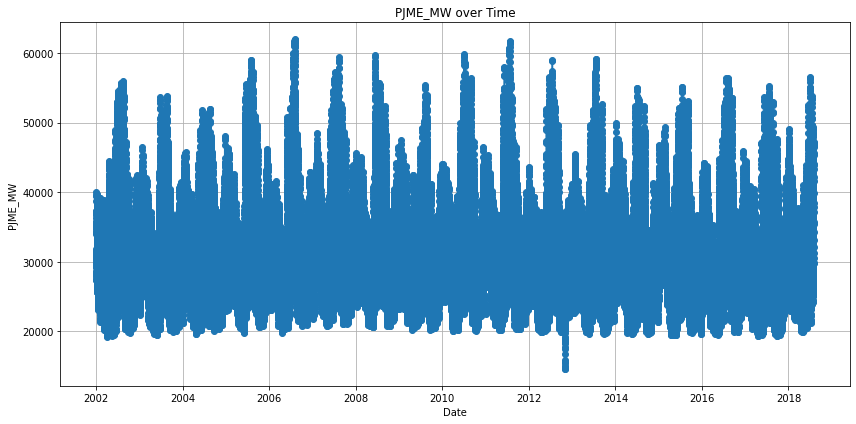

In [11]:
import matplotlib.pyplot as plt

# Convert 'Date' column to datetime object
df['Date'] = pd.to_datetime(df['Date'])

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['PJME_MW'], marker='o', linestyle='-')
plt.title('PJME_MW over Time')
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.grid(True)
plt.tight_layout()
plt.show()


## Standardization

In [28]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the 'PJME_MW' column
df['PJME_MW_standardized'] = scaler.fit_transform(df[['PJME_MW']])

In [29]:
df

,PJME_MW,Date,Time,PJME_MW_standardized
0,26498.0,2002-12-31,01:00:00,-0.863588
1,25147.0,2002-12-31,02:00:00,-1.072592
2,24574.0,2002-12-31,03:00:00,-1.161237
3,24393.0,2002-12-31,04:00:00,-1.189238
4,24860.0,2002-12-31,05:00:00,-1.116992
...,...,...,...,...
145361,44284.0,2018-01-01,20:00:00,1.887964
145362,43751.0,2018-01-01,21:00:00,1.805507
145363,42402.0,2018-01-01,22:00:00,1.596812
145364,40164.0,2018-01-01,23:00:00,1.250586


In [30]:
df["PJME_MW"]=df["PJME_MW_standardized"]

In [31]:
df.drop(columns=['PJME_MW_standardized'], inplace=True)
df

,PJME_MW,Date,Time
0,-0.863588,2002-12-31,01:00:00
1,-1.072592,2002-12-31,02:00:00
2,-1.161237,2002-12-31,03:00:00
3,-1.189238,2002-12-31,04:00:00
4,-1.116992,2002-12-31,05:00:00
...,...,...,...
145361,1.887964,2018-01-01,20:00:00
145362,1.805507,2018-01-01,21:00:00
145363,1.596812,2018-01-01,22:00:00
145364,1.250586,2018-01-01,23:00:00


## Check if Data is Stationary

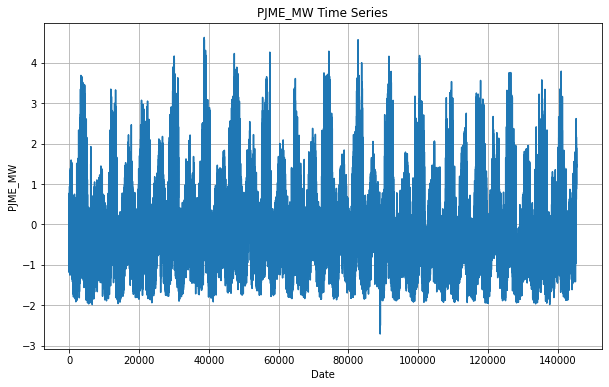

In [16]:
import matplotlib.pyplot as plt

# Plot the 'PJME_MW' time series data
plt.figure(figsize=(10, 6))
plt.plot(df['PJME_MW'])
plt.title('PJME_MW Time Series')
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.grid(True)
plt.show()


In [17]:
from statsmodels.tsa.stattools import adfuller

# Perform ADF test
result = adfuller(df['PJME_MW'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'   {key}: {value}')


ADF Statistic: -18.828912729084507
p-value: 2.0221245081527322e-30
Critical Values:
   1%: -3.430395009088914
   5%: -2.861559893380481
   10%: -2.5667805885384065


#### As the data is already stationary so we dont need to do any thing

# ML Algorithums

## ARIMA

In [18]:
df

,PJME_MW,Date,Time
0,-0.863588,2002-12-31,01:00:00
1,-1.072592,2002-12-31,02:00:00
2,-1.161237,2002-12-31,03:00:00
3,-1.189238,2002-12-31,04:00:00
4,-1.116992,2002-12-31,05:00:00
...,...,...,...
145361,1.887964,2018-01-01,20:00:00
145362,1.805507,2018-01-01,21:00:00
145363,1.596812,2018-01-01,22:00:00
145364,1.250586,2018-01-01,23:00:00


In [20]:
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Perform train-test split
train_size = int(len(df) * 0.8)
train_df = df[:train_size]
test_df = df[train_size:]

# Fit auto ARIMA model to train data
model = auto_arima(train_df['PJME_MW'], seasonal=False, trace=True)  # You can set seasonal=True for seasonal ARIMA
model.fit(train_df['PJME_MW'])

# Forecast future values
forecast = model.predict(n_periods=len(test_df))

# Calculate metrics
mse = mean_squared_error(test_df['PJME_MW'], forecast)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test_df['PJME_MW'], forecast)
r2 = r2_score(test_df['PJME_MW'], forecast)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):", r2)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=-98043.098, Time=123.11 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3306.318, Time=10.44 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-79916.204, Time=6.62 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-53592.331, Time=15.44 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3304.318, Time=5.30 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-81166.706, Time=34.97 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=-97043.108, Time=104.40 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=-96798.382, Time=155.06 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=-93743.062, Time=48.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-80563.938, Time=23.76 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=-81382.032, Time=91.80 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=-97884.740, Time=111.98 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=48.18 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=-98151.153, Time=56.70 sec


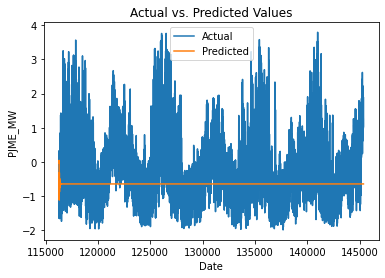

In [22]:
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(test_df.index, test_df['PJME_MW'], label='Actual')

# Plot predicted values
plt.plot(test_df.index, forecast, label='Predicted')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.title('Actual vs. Predicted Values')

# Add legend
plt.legend()

# Show plot
plt.show()


# import matplotlib.pyplot as plt

# # Create figure and axes for two separate plots
# fig, axs = plt.subplots(2, 1, figsize=(10, 8))

# # Plot actual values
# axs[0].plot(test_df.index, test_df['PJME_MW'], label='Actual', color='blue')

# # Set plot labels and title for actual values plot
# axs[0].set_xlabel('Date')
# axs[0].set_ylabel('PJME_MW')
# axs[0].set_title('Actual Hourly Consumption')

# # Add legend
# axs[0].legend()

# # Plot predicted values
# axs[1].plot(test_df.index, forecast, label='Predicted', color='orange')

# # Set plot labels and title for predicted values plot
# axs[1].set_xlabel('Date')
# axs[1].set_ylabel('PJME_MW')
# axs[1].set_title('Predicted Hourly Consumption')

# # Add legend
# axs[1].legend()

# # Adjust layout to prevent overlap
# plt.tight_layout()

# # Show plots
# plt.show()


In [23]:
import pickle

# Save the trained model to a file
model_filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/arima_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully at:", model_filename)


Model saved successfully at: D:/Study Material/semester 6/Data Mining Lab/Project/arima_model.pkl


## ANN

In [32]:
df

,PJME_MW,Date,Time
0,-0.863588,2002-12-31,01:00:00
1,-1.072592,2002-12-31,02:00:00
2,-1.161237,2002-12-31,03:00:00
3,-1.189238,2002-12-31,04:00:00
4,-1.116992,2002-12-31,05:00:00
...,...,...,...
145361,1.887964,2018-01-01,20:00:00
145362,1.805507,2018-01-01,21:00:00
145363,1.596812,2018-01-01,22:00:00
145364,1.250586,2018-01-01,23:00:00


In [33]:
# Convert 'Time' column to string format
df['Time'] = df['Time'].astype(str)

# Convert 'Time' column to datetime objects with a specified format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [34]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt


Epoch 1/10
2908/2908 [==============================] - 4s 1ms/step - loss: 0.5479 - val_loss: 0.4024
Epoch 2/10
2908/2908 [==============================] - 4s 1ms/step - loss: 0.3637 - val_loss: 0.3398
Epoch 3/10
2908/2908 [==============================] - 4s 1ms/step - loss: 0.3347 - val_loss: 0.3264
Epoch 4/10
2908/2908 [==============================] - 4s 1ms/step - loss: 0.3286 - val_loss: 0.3164
Epoch 5/10
2908/2908 [==============================] - 4s 1ms/step - loss: 0.3259 - val_loss: 0.3137
Epoch 6/10
2908/2908 [==============================] - 4s 1ms/step - loss: 0.3231 - val_loss: 0.3292
Epoch 7/10
2908/2908 [==============================] - 3s 1ms/step - loss: 0.3208 - val_loss: 0.3210
Epoch 8/10
2908/2908 [==============================] - 3s 1ms/step - loss: 0.3191 - val_loss: 0.3195
Epoch 9/10
2908/2908 [==============================] - 3s 1ms/step - loss: 0.3166 - val_loss: 0.3028
Epoch 10/10
909/909 [==============================] - 1s 693us/step


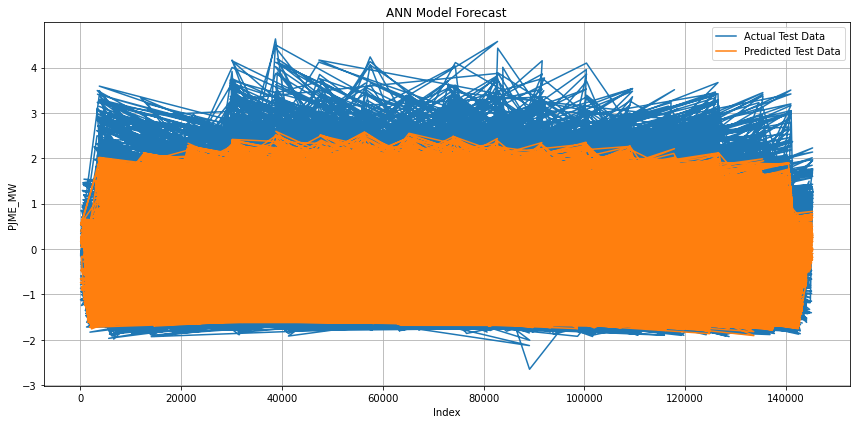

In [35]:

# Prepare the data
# Convert date and time columns to datetime objects
df['Date'] = pd.to_datetime(df['Date'])
df['Time'] = pd.to_datetime(df['Time'])

# Extract features from date and time columns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Hour'] = df['Time'].dt.hour
df['Minute'] = df['Time'].dt.minute

# Drop original date and time columns
df.drop(['Date', 'Time'], axis=1, inplace=True)

# Split data into features and target variable
X = df[['Year', 'Month', 'Day', 'Hour', 'Minute']]
y = df['PJME_MW']

# Normalize features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Design the ANN
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the ANN
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Make predictions
y_pred = model.predict(X_test)

# Visualize predicted and actual values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Test Data')
plt.plot(y_test.index, y_pred, label='Predicted Test Data')
plt.title('ANN Model Forecast')
plt.xlabel('Index')
plt.ylabel('PJME_MW')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print metrics
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)
print("R-squared (R2 Score):", r2)


Mean Squared Error (MSE): 0.3135450763579956
Root Mean Squared Error (RMSE): 0.5599509588865758
Mean Absolute Error (MAE): 0.4188629839231453
R-squared (R2 Score): 0.6822802457970607


In [37]:
import pickle

# Save the trained model to a file
model_filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/ann_model.pkl'
with open(model_filename, 'wb') as f:
    pickle.dump(model, f)

print("Model saved successfully at:", model_filename)


Model saved successfully at: D:/Study Material/semester 6/Data Mining Lab/Project/ann_model.pkl


# SARIMA

In [24]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,-0.863588
1,2002-12-31 02:00:00,-1.072592
2,2002-12-31 03:00:00,-1.161237
3,2002-12-31 04:00:00,-1.189238
4,2002-12-31 05:00:00,-1.116992
...,...,...
145361,2018-01-01 20:00:00,1.887964
145362,2018-01-01 21:00:00,1.805507
145363,2018-01-01 22:00:00,1.596812
145364,2018-01-01 23:00:00,1.250586


In [25]:
import pandas as pd

# Assuming your DataFrame is named df
# Convert 'Datetime' column to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Filter out rows with Datetime values from 2002 to 2008
df_filtered = df[df['Datetime'].dt.year > 2008]

# Reset index if needed
df_filtered.reset_index(drop=True, inplace=True)

# Display the resulting DataFrame
print(df_filtered)


                 Datetime   PJME_MW
0     2009-01-01 00:00:00  0.477534
1     2009-12-31 01:00:00 -0.100746
2     2009-12-31 02:00:00 -0.286545
3     2009-12-31 03:00:00 -0.399633
4     2009-12-31 04:00:00 -0.439701
...                   ...       ...
84008 2018-01-01 20:00:00  1.887964
84009 2018-01-01 21:00:00  1.805507
84010 2018-01-01 22:00:00  1.596812
84011 2018-01-01 23:00:00  1.250586
84012 2018-01-02 00:00:00  1.009868

[84013 rows x 2 columns]


In [27]:
df=df_filtered

In [28]:
print(df.dtypes)

Datetime    datetime64[ns]
PJME_MW            float64
dtype: object


In [29]:
# # Prepare the Data
# df['DateTime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'])
df.set_index('Datetime', inplace=True)
df.sort_index(inplace=True)

C:\Users\ahmad\AppData\Local\Temp\ipykernel_5948\1441513061.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_index(inplace=True)


In [30]:
# Convert the index to datetime if it's not already
df.index = pd.to_datetime(df.index)

# Remove duplicate index values
df = df[~df.index.duplicated(keep='first')]

# Re-create the index with hourly frequency
df = df.reindex(pd.date_range(start=df.index.min(), end=df.index.max(), freq='H'))


In [31]:
df

,PJME_MW
2009-01-01 00:00:00,0.477534
2009-01-01 01:00:00,0.284465
2009-01-01 02:00:00,0.121872
2009-01-01 03:00:00,0.001667
2009-01-01 04:00:00,-0.069342
...,...
2018-08-02 20:00:00,1.852846
2018-08-02 21:00:00,1.728929
2018-08-02 22:00:00,1.465314
2018-08-02 23:00:00,0.993160


In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error


In [33]:
# Drop rows with missing or infinite values
df = df.dropna()  # Drop rows with missing values
df = df.replace([np.inf, -np.inf], np.nan).dropna()  # Drop rows with infinite values



ADF Statistic: -13.442811777883424
p-value: 3.815738355598632e-25


C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


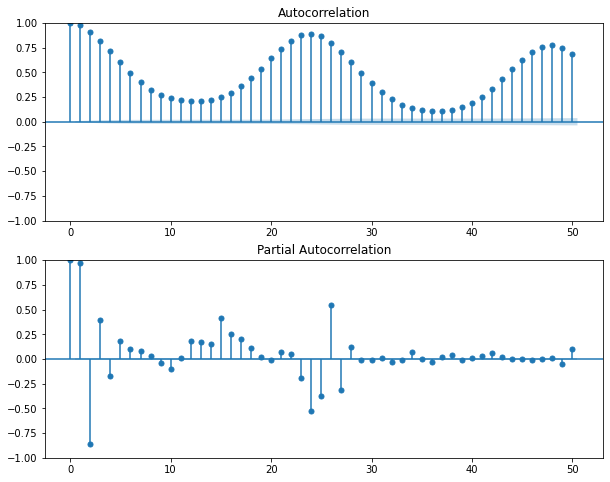

In [34]:
# Determine Stationarity
result = adfuller(df['PJME_MW'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

# Plot ACF and PACF
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(df['PJME_MW'], ax=ax[0], lags=50)
plot_pacf(df['PJME_MW'], ax=ax[1], lags=50)
plt.show()

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Function to fit a moving average model on the data
def fit_ma_model(data, window):
    return data.rolling(window=window).mean()

# Function to forecast future values using the fitted moving average model
def forecast_ma_model(model, steps):
    last_value = model.iloc[-1, 0]  # Extract the last value from the DataFrame
    forecast = np.full(steps, last_value)
    return forecast

# Calculate evaluation metrics (e.g., MSE, RMSE) using the actual test data and forecasted values
def calculate_metrics(test_data, forecasted_values):
    # Remove NaN values from both arrays
    test_data = test_data.dropna()
    forecasted_values = forecasted_values[:len(test_data)]
    
    # Calculate evaluation metrics
    mse = mean_squared_error(test_data, forecasted_values)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(test_data, forecasted_values)
    
    return mse, rmse, mae

# Split the Data into training and test sets
train_size = int(len(df) * 0.8)  # 80% for training
train_data, test_data = df[:train_size], df[train_size:]

# Choose the window size for the moving average model
window = 24  # Adjust as needed

# Fit the moving average model on the training data
ma_model = fit_ma_model(train_data, window)

# Forecast future values using the moving average model
forecasted_values = forecast_ma_model(ma_model, len(test_data))

# Calculate evaluation metrics
mse, rmse, mae = calculate_metrics(test_data['PJME_MW'], forecasted_values)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)
print('Mean Absolute Error (MAE):', mae)

Mean Squared Error (MSE): 1.7878805980596073
Root Mean Squared Error (RMSE): 1.3371165237403984
Mean Absolute Error (MAE): 1.1674509723616715


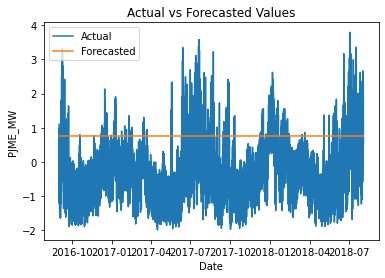

In [36]:
import matplotlib.pyplot as plt

# Plot actual values
plt.plot(test_data.index, test_data['PJME_MW'], label='Actual')

# Plot forecasted values
plt.plot(test_data.index, forecasted_values, label='Forecasted')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.title('Actual vs Forecasted Values')
plt.legend()

# Show plot
plt.show()


In [37]:
import pickle

# Define the filename for saving the model
model_filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/sarima_model.pkl'

# Save the SARIMA model to a pickle file
with open(model_filename, 'wb') as f:
    pickle.dump(ma_model, f)

print("Model saved successfully at:", model_filename)


Model saved successfully at: D:/Study Material/semester 6/Data Mining Lab/Project/sarima_model.pkl


# Exponential Smoothing (ETS):


In [45]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [46]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,-0.863588
1,2002-12-31 02:00:00,-1.072592
2,2002-12-31 03:00:00,-1.161237
3,2002-12-31 04:00:00,-1.189238
4,2002-12-31 05:00:00,-1.116992
...,...,...
145361,2018-01-01 20:00:00,1.887964
145362,2018-01-01 21:00:00,1.805507
145363,2018-01-01 22:00:00,1.596812
145364,2018-01-01 23:00:00,1.250586


In [47]:
# Assuming your DataFrame is named df
# Convert 'Datetime' column to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])


In [48]:
train_size = int(len(df) * 0.8)
train, test = df.iloc[:train_size], df.iloc[train_size:]


In [49]:
# Define parameters for ETS model
seasonal_periods = 24  # Assuming hourly data with daily seasonality
trend = 'add'  # or 'mul' for multiplicative trend
seasonal = 'add'  # or 'mul' for multiplicative seasonality

# Fit ETS model
model = ExponentialSmoothing(train['PJME_MW'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
fitted_model = model.fit()


In [50]:
# Make predictions
predictions = fitted_model.forecast(len(test))


In [51]:
# Mean Absolute Error (MAE)
mae = mean_absolute_error(test['PJME_MW'], predictions)
print("Mean Absolute Error:", mae)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(test['PJME_MW'], predictions))
print("Root Mean Squared Error:", rmse)

# Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((test['PJME_MW'] - predictions) / test['PJME_MW'])) * 100
print("Mean Absolute Percentage Error:", mape)

# Symmetric Mean Absolute Percentage Error (SMAPE)
smape = 100/len(test) * np.sum(2 * np.abs(predictions - test['PJME_MW']) / (np.abs(test['PJME_MW']) + np.abs(predictions)))
print("Symmetric Mean Absolute Percentage Error:", smape)

Mean Absolute Error: 0.8777697699798604
Root Mean Squared Error: 1.1704541290967574
Mean Absolute Percentage Error: 526.449465856298
Symmetric Mean Absolute Percentage Error: 116.78364909492599


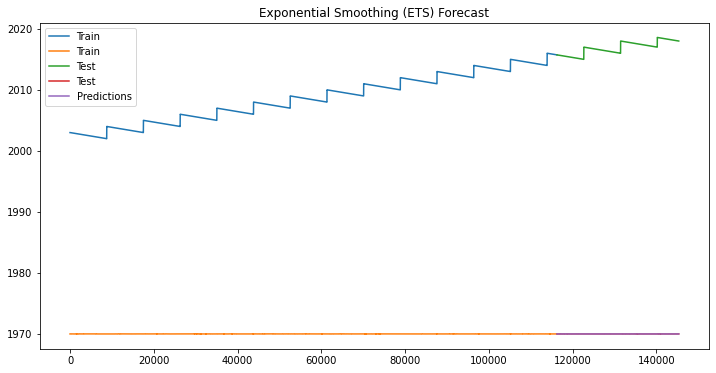

In [53]:
# Visualize predictions against actual values
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='Predictions')
plt.legend()
plt.title('Exponential Smoothing (ETS) Forecast')
plt.show()

In [54]:
import pickle

# Define the filename for saving the model
model_filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/ets_model.pkl'

# Save the ETS model to a pickle file
with open(model_filename, 'wb') as f:
    pickle.dump(fitted_model, f)

print("Model saved successfully at:", model_filename)


Model saved successfully at: D:/Study Material/semester 6/Data Mining Lab/Project/ets_model.pkl


# Prophet

In [55]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,-0.863588
1,2002-12-31 02:00:00,-1.072592
2,2002-12-31 03:00:00,-1.161237
3,2002-12-31 04:00:00,-1.189238
4,2002-12-31 05:00:00,-1.116992
...,...,...
145361,2018-01-01 20:00:00,1.887964
145362,2018-01-01 21:00:00,1.805507
145363,2018-01-01 22:00:00,1.596812
145364,2018-01-01 23:00:00,1.250586


In [56]:
from prophet import Prophet


In [57]:
# Assuming your DataFrame is named df
# Convert 'Datetime' column to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])


In [58]:
# Rename columns as required by Prophet
df_prophet = df.rename(columns={'Datetime': 'ds', 'PJME_MW': 'y'})

# Create a Prophet model instance
model = Prophet()


DEBUG:cmdstanpy:cmd: where.exe tbb.dll
cwd: None
DEBUG:cmdstanpy:Adding TBB (C:\Users\ahmad\anaconda3\lib\site-packages\prophet\stan_model\cmdstan-2.33.1\stan\lib\stan_math\lib\tbb) to PATH


In [59]:
# Fit the model to your data
model.fit(df_prophet)


DEBUG:cmdstanpy:input tempfile: C:\Users\ahmad\AppData\Local\Temp\tmpb0cnfbx7\wns8ofa6.json
DEBUG:cmdstanpy:input tempfile: C:\Users\ahmad\AppData\Local\Temp\tmpb0cnfbx7\5rsvj1ha.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['C:\\Users\\ahmad\\anaconda3\\Lib\\site-packages\\prophet\\stan_model\\prophet_model.bin', 'random', 'seed=41779', 'data', 'file=C:\\Users\\ahmad\\AppData\\Local\\Temp\\tmpb0cnfbx7\\wns8ofa6.json', 'init=C:\\Users\\ahmad\\AppData\\Local\\Temp\\tmpb0cnfbx7\\5rsvj1ha.json', 'output', 'file=C:\\Users\\ahmad\\AppData\\Local\\Temp\\tmpb0cnfbx7\\prophet_model8r5fgk1s\\prophet_model-20240514134855.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
13:48:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
13:51:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [60]:
# Make future predictions
future = model.make_future_dataframe(periods=365)  # Forecasting for the next 365 days
forecast = model.predict(future)


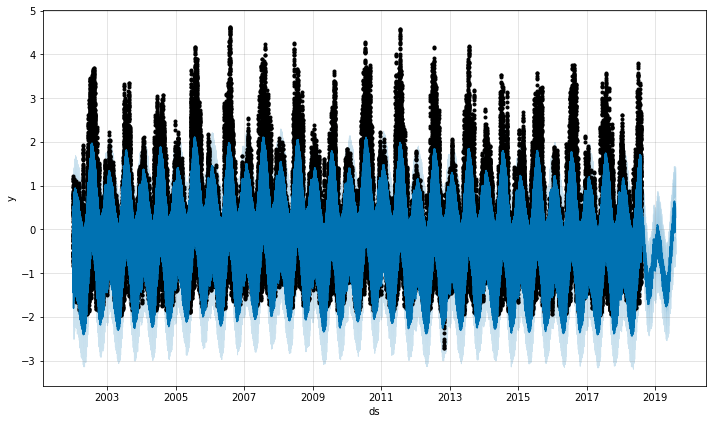

In [61]:
# Plot the forecast
fig = model.plot(forecast)


In [62]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Truncate forecast to match the length of the original dataset
forecast_truncated = forecast.iloc[:len(df_prophet)]

# Actual values
y_true = df_prophet['y']

# Forecasted values
y_pred = forecast_truncated['yhat']

# Calculate MAE
mae = mean_absolute_error(y_true, y_pred)

# Calculate MSE
mse = mean_squared_error(y_true, y_pred)

# Calculate RMSE
rmse = np.sqrt(mse)

# Calculate MAPE
mape = np.mean(np.abs((y_true - y_pred) / y_true)) 

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)


Mean Absolute Error (MAE): 0.789168525678792
Mean Squared Error (MSE): 0.9964099263780638
Root Mean Squared Error (RMSE): 0.9982033492120049
Mean Absolute Percentage Error (MAPE): 7.935940466268221


In [63]:
import pickle

# Define the filename for saving the pickle file
pickle_filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/prophet_model.pkl'

# Save the Prophet model to a pickle file
with open(pickle_filename, 'wb') as f:
    pickle.dump(model, f)

print("Prophet model saved successfully at:", pickle_filename)


Prophet model saved successfully at: D:/Study Material/semester 6/Data Mining Lab/Project/prophet_model.pkl


# Support Vector Regression (SVR):


In [81]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,-0.863588
1,2002-12-31 02:00:00,-1.072592
2,2002-12-31 03:00:00,-1.161237
3,2002-12-31 04:00:00,-1.189238
4,2002-12-31 05:00:00,-1.116992
...,...,...
145361,2018-01-01 20:00:00,1.887964
145362,2018-01-01 21:00:00,1.805507
145363,2018-01-01 22:00:00,1.596812
145364,2018-01-01 23:00:00,1.250586


In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

In [83]:
# Assuming your DataFrame is named df
# Convert 'Datetime' column to datetime type if it's not already
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Split data into features (datetime) and target (energy consumption)
X = df['Datetime'].values.reshape(-1, 1)  # Features
y = df['PJME_MW'].values  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train SVR model with grid search for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svr_model = SVR()
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)

# Best hyperparameters
best_params = grid_search.best_params_

# Train SVR model with best hyperparameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(X_train_scaled, y_train)

# Make predictions
predictions = best_svr_model.predict(X_test_scaled)

# Evaluate model
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)


In [ ]:
# Visualization
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, predictions, color='red', label='Predicted')
plt.title('SVR Model')
plt.xlabel('Datetime')
plt.ylabel('Energy Consumption')
plt.legend()
plt.show()


In [ ]:
import pickle

# Define the filename for saving the pickle file
pickle_filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/svr_model.pkl'

# Save the SVR model to a pickle file
with open(pickle_filename, 'wb') as f:
    pickle.dump(best_svr_model, f)

print("SVR model saved successfully at:", pickle_filename)


# Long Short-Term Memory (LSTM)

In [7]:
df

,Datetime,PJME_MW
0,2002-12-31 01:00:00,-0.863588
1,2002-12-31 02:00:00,-1.072592
2,2002-12-31 03:00:00,-1.161237
3,2002-12-31 04:00:00,-1.189238
4,2002-12-31 05:00:00,-1.116992
...,...,...
145361,2018-01-01 20:00:00,1.887964
145362,2018-01-01 21:00:00,1.805507
145363,2018-01-01 22:00:00,1.596812
145364,2018-01-01 23:00:00,1.250586


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error


In [9]:
# Step 1: Prepare Data
# Convert Datetime column to datetime type
df['Datetime'] = pd.to_datetime(df['Datetime'])
# Set Datetime column as index
df.set_index('Datetime', inplace=True)

In [10]:
# Step 2: Data Preprocessing
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)

# Split data into train and test sets
train_size = int(len(df) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

def create_dataset(data, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:(i + time_steps)])
        y.append(data[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 24  # You can adjust this based on your requirement
X_train, y_train = create_dataset(train_data, time_steps)
X_test, y_test = create_dataset(test_data, time_steps)

In [11]:
# Step 3: Build LSTM Model
model = Sequential([
    LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

In [12]:
# Step 4: Train the Model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50
3634/3634 [==============================] - 41s 10ms/step - loss: 0.0017 - val_loss: 5.2463e-04
Epoch 2/50
3634/3634 [==============================] - 36s 10ms/step - loss: 3.9708e-04 - val_loss: 4.6705e-04
Epoch 3/50
3634/3634 [==============================] - 40s 11ms/step - loss: 3.4805e-04 - val_loss: 3.5603e-04
Epoch 4/50
3634/3634 [==============================] - 41s 11ms/step - loss: 2.8194e-04 - val_loss: 2.7875e-04
Epoch 5/50
3634/3634 [==============================] - 40s 11ms/step - loss: 2.5266e-04 - val_loss: 2.6982e-04
Epoch 6/50
3634/3634 [==============================] - 50s 14ms/step - loss: 2.3924e-04 - val_loss: 2.8063e-04
Epoch 7/50
3634/3634 [==============================] - 39s 11ms/step - loss: 2.2368e-04 - val_loss: 2.6637e-04
Epoch 8/50
3634/3634 [==============================] - 47s 13ms/step - loss: 2.1613e-04 - val_loss: 2.6573e-04
Epoch 9/50
3634/3634 [==============================] - 44s 12ms/step - loss: 2.0838e-04 - val_loss: 2.5926e

In [13]:
# Step 5: Evaluate Performance
predicted = model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

mae = mean_absolute_error(y_test_inv, predicted)
mse = mean_squared_error(y_test_inv, predicted)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)

908/908 [==============================] - 5s 5ms/step
Mean Absolute Error: 0.04952988495713872
Mean Squared Error: 0.0081491244218052


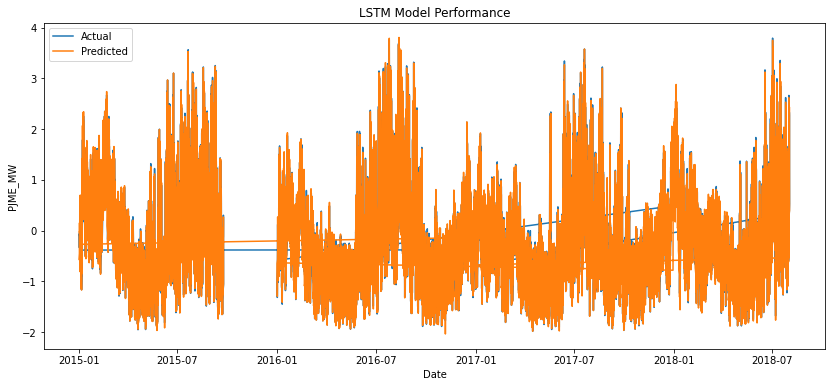

In [14]:
# Step 6: Visualize Results
plt.figure(figsize=(14, 6))
plt.plot(df.index[train_size + time_steps:], y_test_inv, label='Actual')
plt.plot(df.index[train_size + time_steps:], predicted, label='Predicted')
plt.legend()
plt.title('LSTM Model Performance')
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.show()

In [15]:
import pickle

# Define the filename for saving the model
filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/lstm_model.pkl'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(model, file)


# Hybrid

In [16]:
df

,PJME_MW
Datetime,
2002-12-31 01:00:00,-0.863588
2002-12-31 02:00:00,-1.072592
2002-12-31 03:00:00,-1.161237
2002-12-31 04:00:00,-1.189238
2002-12-31 05:00:00,-1.116992
...,...
2018-01-01 20:00:00,1.887964
2018-01-01 21:00:00,1.805507
2018-01-01 22:00:00,1.596812


In [17]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [18]:
from sklearn.model_selection import TimeSeriesSplit

# Initialize lists to store accuracy metrics
mae_list = []
mse_list = []

# Split data into train and test sets using TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=5)
for train_index, test_index in tscv.split(df):
    train, test = df.iloc[train_index], df.iloc[test_index]
    
    # Fit ARIMA model
    arima_model = ARIMA(train['PJME_MW'], order=(5,1,0))
    arima_model_fit = arima_model.fit()
    
    # Generate ARIMA forecasts for the current fold
    arima_forecast = arima_model_fit.forecast(steps=len(test))
    
    # Calculate residuals
    residuals = test['PJME_MW'].values - arima_forecast
    
    # Train ANN model on residuals
    scaler = MinMaxScaler(feature_range=(-1, 1))
    residuals_scaled = scaler.fit_transform(residuals.values.reshape(-1, 1))  # Convert to NumPy array
    
    X = []
    y = []
    look_back = 24  # Assuming using last 24 hours for prediction

    for i in range(len(residuals_scaled) - look_back):
        X.append(residuals_scaled[i:i+look_back])
        y.append(residuals_scaled[i+look_back])

    X, y = np.array(X), np.array(y)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = Sequential([
        Dense(64, input_shape=(look_back,), activation='relu'),
        Dense(32, activation='relu'),
        Dense(1)
    ])

    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=0)

    # Combine ARIMA forecasts with ANN predictions
    ann_forecast = model.predict(X_test).reshape(-1)
    
    # Ensure the lengths of forecasts match
    min_len = min(len(arima_forecast), len(ann_forecast))
    arima_forecast = arima_forecast[:min_len]
    ann_forecast = ann_forecast[:min_len]
    
    hybrid_forecast = arima_forecast + scaler.inverse_transform(ann_forecast.reshape(-1, 1)).reshape(-1)
    
    # Evaluate accuracy metrics for the current fold
    mae = mean_absolute_error(test['PJME_MW'][:min_len], hybrid_forecast)
    mse = mean_squared_error(test['PJME_MW'][:min_len], hybrid_forecast)
    
    # Append accuracy metrics to lists
    mae_list.append(mae)
    mse_list.append(mse)

# Compute the mean of accuracy metrics across all folds
mean_mae = np.mean(mae_list)
mean_mse = np.mean(mse_list)

print(f'Mean Absolute Error (MAE) across all folds: {mean_mae}')
print(f'Mean Squared Error (MSE) across all folds: {mean_mse}')


C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-

152/152 [==============================] - 0s 675us/step


C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-

152/152 [==============================] - 0s 899us/step


C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-

152/152 [==============================] - 0s 792us/step


C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-

152/152 [==============================] - 0s 730us/step


C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-

152/152 [==============================] - 0s 679us/step
Mean Absolute Error (MAE) across all folds: 1.1125372771001765
Mean Squared Error (MSE) across all folds: 2.0117667707505764


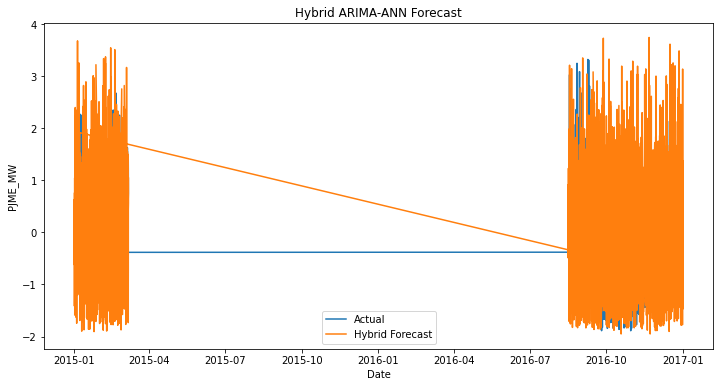

In [19]:
# Step 7: Visualize the forecast results
plt.figure(figsize=(12, 6))
plt.plot(test.index[:len(hybrid_forecast)], test['PJME_MW'][:len(hybrid_forecast)], label='Actual')
plt.plot(test.index[:len(hybrid_forecast)], hybrid_forecast, label='Hybrid Forecast')
plt.xlabel('Date')
plt.ylabel('PJME_MW')
plt.title('Hybrid ARIMA-ANN Forecast')
plt.legend()
plt.show()


In [20]:
import pickle

# Define the filename for saving the combined model
combined_model_filename = 'D:/Study Material/semester 6/Data Mining Lab/Project/combined_model.pkl'

# Create a dictionary to store the models
hybrid_model = {'ARIMA_models': [], 'ANN_model': model}

# Save ARIMA models to the dictionary
for train_index, _ in tscv.split(df):
    train = df.iloc[train_index]
    arima_model = ARIMA(train['PJME_MW'], order=(5,1,0))
    arima_model_fit = arima_model.fit()
    hybrid_model['ARIMA_models'].append(arima_model_fit)

# Save the combined model to disk
with open(combined_model_filename, 'wb') as file:
    pickle.dump(hybrid_model, file)


C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\ahmad\anaconda3\lib\site-